In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
# import zipfile
# zip_path = '/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip'
# extracted_path = '/kaggle/working/'

# # Extract the zip file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

In [13]:
df=pd.read_csv('/kaggle/working/train.csv')

In [14]:
df.head()
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [15]:
import re

def clean_text(text):
    # Remove newline characters
    text = text.replace('\n', ' ')
    
    # Remove unwanted characters or formatting issues using regex
    text = re.sub(r"[^a-zA-Z0-9\s.,!?']", ' ', text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply the cleaning function to the text column
df['comment_text'] = df['comment_text'].apply(clean_text)

# Display the cleaned data
print(df.head())
df.dropna()

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation Why the edits made under my userna...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  More I can't make any real suggestions on impr...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,More I can't make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"And for the second time of asking, when your v...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself That is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer Umm, theres no actual article for pros...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [16]:
X = df['comment_text'].tolist()
y = df.drop(['id', 'comment_text'], axis=1).values.tolist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


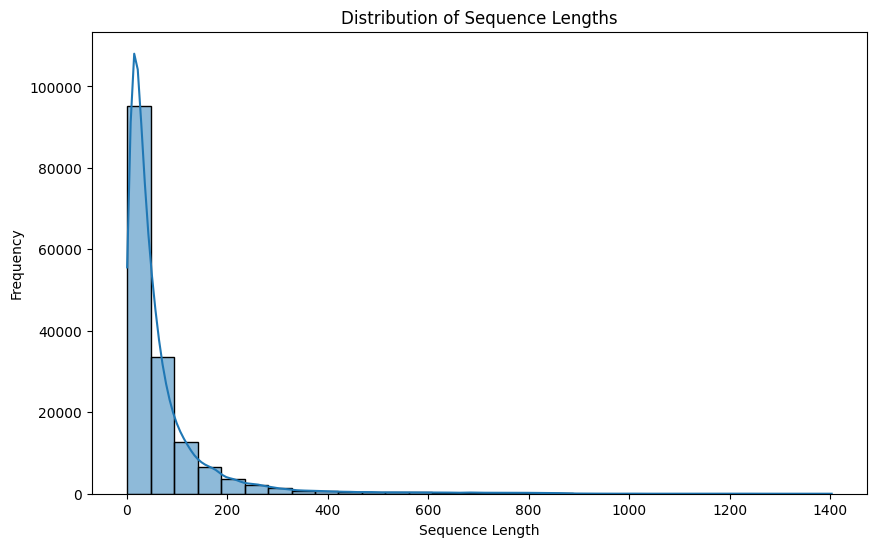

{50: 36, 75: 76, 90: 154, 95: 232, 99: 580}


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences=tokenizer.texts_to_sequences(X)

sequence_lengths = [len(seq) for seq in sequences]

# Plot the distribution of sequence lengths
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=30, kde=True)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

# Calculate percentiles to decide on an appropriate maxlen
percentiles = [50, 75, 90, 95, 99]
length_percentiles = {p: int(np.percentile(sequence_lengths, p)) for p in percentiles}

print(length_percentiles)

padded_sequences=pad_sequences(sequences,padding='post',maxlen=300)

In [21]:
X

array([[  688,    76,     2, ...,     0,     0,     0],
       [93511,    53,  2633, ...,     0,     0,     0],
       [  412,   436,    75, ...,     0,     0,     0],
       ...,
       [34015,  7334,  5200, ...,     0,     0,     0],
       [    5,    12,   575, ...,     0,     0,     0],
       [    5,     8,   135, ...,     0,     0,     0]], dtype=int32)

In [18]:
X=np.array(padded_sequences)
y=np.array(y)
size=len(tokenizer.word_index)+1

In [19]:
X.shape

(159571, 300)

In [22]:
import keras_tuner as kt
import tensorflow as tf


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=size,output_dim=200,input_length=300))
model.add(tf.keras.layers.LSTM(150))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(6, activation='sigmoid'))


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(X,y,validation_split=.2,epochs=5,)

Epoch 1/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 126s 32ms/step - accuracy: 0.9129 - loss: 0.1525 - val_accuracy: 0.9941 - val_loss: 0.1398
Epoch 2/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 126s 32ms/step - accuracy: 0.9942 - loss: 0.1428 - val_accuracy: 0.9941 - val_loss: 0.1401
Epoch 3/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 126s 32ms/step - accuracy: 0.9934 - loss: 0.0944 - val_accuracy: 0.9941 - val_loss: 0.0499
Epoch 4/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 126s 32ms/step - accuracy: 0.9942 - loss: 0.0428 - val_accuracy: 0.9941 - val_loss: 0.0499
Epoch 5/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 126s 32ms/step - accuracy: 0.9939 - loss: 0.0356 - val_accuracy: 0.9941 - val_loss: 0.0563


In [27]:
model.save('model.h5')